# Wrangle and Analyze 'WeRateDogs' Twitter Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from timeit import default_timer as timer

## Gathering Phase

In [2]:
#Read in dataframe and return first 5 rows
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Programmatic download of tweet image predictions from server
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
#Read in image predictions dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [5]:
#Twitter provided unique consumer/access key/tokens
consumer_key = 'N/A'
consumer_secret = 'N/A'
access_token = 'N/A'
access_secret = 'N/A'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#Creates an API object that you can use to gather Twitter data
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)



In [ ]:
tweets_id = list(df.tweet_id)
working_tweets = []
nonworking_tweets = []

with open('tweet_json.txt', 'w') as file: #Using 'with open () as file' properly opens/closes the file. (Best practice)
    for id_of_tweet in tweets_id:
        try:
            start = timer()
            tweet = api.get_status(id_of_tweet, tweet_mode = 'extended')
            json.dump(tweet._json, file) #Writes values into JSON file (json.dump), Converts format into JSON (_json)
            file.write('\n') #Starts a new line for each tweet in JSON format
            working_tweets.append(id_of_tweet)
            end = timer()
            print(id_of_tweet, end - start)
            
        except Exception as e:
            nonworking_tweets.append(id_of_tweet)
    
    


        


In [5]:
#Read in file in JSON format
df_tweet = pd.read_json('tweet_json.txt', lines = True, encoding = 'utf-8')
pd.set_option('display.max_columns', 500) #Set dataframe to display all columns
df_tweet.head(20)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37559,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8194,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32289,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,6060,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24330,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,4008,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40912,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,8343,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39100,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,891327558926688256,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,9042,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19668,False,Here we have a majestic great white breaching ...,NaN,891087950875897856,891087950875897856,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,3000,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11494,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,890971913173991426,890971913173991424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,1985,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",63399,False,When you watch your owner call another dog a g...,NaN,890729181411237888,890729181411237888,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,18204,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'

In [6]:
#Create copies of the 3 files in order to preserve contents of the originals
df_clean = df.copy()
image_predictions_clean = image_predictions.copy()
df_tweet_clean = df_tweet.copy()

## Assessment Phase




### Quality Issues

#### Twitter archive table :
- Timestamp column has "+0000" after every timestamp
- Inaccurate values in 'rating_denominator' column. (Should maintain consistency at 10)
- Inaccurate values in 'rating_numerator' column related to inaccurate denominators above.
- Timestamp column is a string data type, not as datetime.
- Erroneous dog names - 'O'. Should be O'Malley.
- Rows contain multiple dog stages (e.g. doggo and floofer)

#### Image Predictions table :
- Lowercase dog breed names (columns p1, p2, p3)


#### Twitter API table :
- All languages in the 'lang' column should be 'en' (English) per the 'user' column of each non-english observation

#### Master Twitter Archive table :
- Non-useful columns in the master dataset for analysis.
- Multiple columns with missing values
- Favorite and retweet count column has float data type


### Tidiness Issues
- In Twitter archive table, the dog stages (doggo, floofer, pupper, and puppo) are in separate columns.
- Three tables unmerged by tweet id (Join Twitter API and Image predictions table on Twitter archive ID).

### Twitter Archive Table

In [10]:
#Returns basic information on dataframe structure
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [35]:
#Check for tweet ID duplicates
df_clean.tweet_id.duplicated().sum()

0

In [21]:
#Check to see if any columns does not contain 0000
df_clean.timestamp.str.contains('0000').sum() - df_clean.timestamp.shape[0]

0

In [12]:
df_clean['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
df_clean['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [14]:
df_clean['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [37]:
df_clean['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
#Check to see if there are multiple dog stages in a single observation
pd.set_option('max.colwidth', 800)
df_clean.query('doggo != "None" & floofer != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


In [25]:
#Check to see if there are multiple dog stages in a single observation
pd.set_option('max.colwidth', 800)
df_clean.query('doggo != "None" & pupper != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,Non

In [26]:
#Check to see if there are multiple dog stages in a single observation
pd.set_option('max.colwidth', 800)
df_clean.query('doggo != "None" & puppo != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


In [27]:
pd.set_option('max.colwidth', 800)
df_clean.query('floofer != "None" & pupper != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [28]:
pd.set_option('max.colwidth', 800)
df_clean.query('floofer != "None" & puppo != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [29]:
pd.set_option('max.colwidth', 800)
df_clean.query('pupper != "None" & puppo != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [23]:
#Check to see if denominator rating values are uniform
df_clean.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [9]:
#Investigate denominator outliers
pd.set_option('max.colwidth', 1000)
df_clean[df_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [33]:
df_clean.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
an             7
Buddy          7
Toby           7
Daisy          7
Scout          6
Dave           6
Bella          6
Leo            6
Jack           6
Rusty          6
Koda           6
Jax            6
Milo           6
Stanley        6
Oscar          6
Larry          5
            ... 
Stu            1
Rodney         1
Lipton         1
Kawhi          1
JD             1
Jazz           1
Ginger         1
Bloop          1
Sunshine       1
Skye           1
Kanu           1
Willie         1
Crawford       1
Charleson      1
Jaspers        1
Brownie        1
Jordy          1
Rhino          1
Jo             1
Chaz           1
Eugene         1
Hall           1
Tycho          1
Lizzie         1
Emanuel        1
Erik           1
Edgar          1
Jeffri        

In [60]:
df_clean[df_clean['name'] == 'such']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None


### Twitter API Table

In [7]:
#Returns basic information on dataframe structure
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2337 non-null datetime64[ns]
display_text_range               2337 non-null object
entities                         2337 non-null object
extended_entities                2065 non-null object
favorite_count                   2337 non-null int64
favorited                        2337 non-null bool
full_text                        2337 non-null object
geo                              0 non-null float64
id                               2337 non-null int64
id_str                           2337 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [90]:
#Returns statistical summary
df_tweet_clean.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2337.000000,0.0,2.337000e+03,2.337000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2203.0,2203.0,2.600000e+01,2.600000e+01,2337.000000
mean,NaN,NaN,7850.226359,NaN,7.420692e+17,7.420692e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.0,0.0,8.113972e+17,8.113972e+17,2879.842533
std,NaN,NaN,12167.091416,NaN,6.824243e+16,6.824243e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.0,0.0,6.295843e+16,6.295843e+16,4865.149030
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,1.000000
25%,NaN,NaN,1364.000000,NaN,6.783345e+17,6.783345e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.0,0.0,7.761338e+17,7.761338e+17,580.000000
50%,NaN,NaN,3421.000000,NaN,7.185406e+17,7.185406e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.281173e+17,8.281173e+17,1345.000000
75%,NaN,NaN,9622.000000,NaN,7.986825e+17,7.986825e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.637581e+17,8.637581e+17,3357.000000
max,NaN,NaN,162301.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,82534.000000


In [57]:
#Check for ID duplication
df_tweet_clean.id.duplicated().sum()

0

In [59]:
#Check for ID_STR duplication
df_tweet_clean.id_str.duplicated().sum()

0

In [31]:
#Show count of all unique values
df_tweet_clean.lang.value_counts()

en     2319
und       7
in        3
nl        3
ro        1
tl        1
eu        1
es        1
et        1
Name: lang, dtype: int64

In [34]:
# Show all non-English observations
pd.set_option('max.colwidth', 1000)
df_tweet_clean[df_tweet_clean.lang != 'en']

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21, 26]}], 'symbols': [], 'user_mentions': [{'screen_name': 'Athletics', 'name': 'Oakland A's', 'id': 19607400, 'id_str': '19607400', 'indices': [3, 13]}], 'urls': [{'url': 'https://t.co/WxwJmvjfxo', 'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873', 'display_url': 'twitter.com/dog_rates/stat…', 'indices': [27, 50]}]}",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,NaN,886054160059072513,886054160059072512,None,NaN,NaN,NaN,NaN,True,und,None,0.0,0.0,NaN,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded': 'https://twitter.com/dog_rates/status/886053434075471873', 'display': 'twitter.com/dog_rates/stat…'}",105,False,"{'created_at': 'Sat Jul 15 02:44:07 +0000 2017', 'id': 886053734421102592, 'id_str': '886053734421102592', 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo', 'truncated': False, 'display_text_range': [0, 11], 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/WxwJmvjfxo', 'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873', 'display_url': 'twitter.com/dog_rates/stat…', 'indices': [12, 35]}]}, 'source': '<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 19607400, 'id_str': '19607400', 'name': 'Oakland A's', 'screen_name': 'Athletics', 'location': 'Oakland, CA', 'description': 'Official Twitter of the nine-time World Series champion Athletics | #RootedInOakland | Instagram: @athletics | Sna...","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™', 'screen_name': 'dog_rates', 'location': '「 DM YOUR DOGS 」', 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀ cover photo: @TPaningning', 'url': 'https://t.co/N7sNNHSfPq', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHSfPq', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 8017563, 'friends_count': 12, 'listed_count': 6194, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 141852, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 10151, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/them..."
158,NaN,NaN,2017-05-04 17:01:34,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dog_rates', 'name': 'WeRateDogs™', 'id': 4196983835, 'id_str': '4196983835', 'indices': [3, 13]}], 'urls': []}",NaN,0,False,RT @dog_rates: Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.c…,NaN,860177593139703809,860177593139703808,None,NaN,NaN,NaN,NaN,False,in,None,NaN,NaN,NaN,NaN,NaN,NaN,30974,False,"{'created_at': 'Fri Aug 05 21:19:27 +0000 2016', 'id': 761672994376806400, 'id_str': '761672994376806400', 'full_text': 'Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyoh

In [51]:
df_tweet_clean.retweeted.value_counts()

False    2337
Name: retweeted, dtype: int64

In [19]:
df_tweet_clean.extended_entities.head(1)

0    {'media': [{'id': 892420639486877696, 'id_str'...
Name: extended_entities, dtype: object

In [17]:
df_tweet_clean.extended_entities.isnull().sum()

272

In [18]:
df_tweet_clean[df_tweet_clean.extended_entities.isnull()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
29,NaN,NaN,2017-07-15 16:51:35,"[27, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,116,False,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,...,NaN,NaN,NaN,NaN,4,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,...,NaN,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",105,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
34,NaN,NaN,2017-07-13 15:19:09,"[0, 47]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,19864,False,I have a new hero and his name is Howard. 14/1...,NaN,...,NaN,NaN,NaN,NaN,3617,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
41,NaN,NaN,2017-07-10 03:08:17,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,70808,False,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,...,{'created_at': 'Sun Jul 09 08:26:49 +0000 2017...,8.839657e+17,8.839657e+17,"{'url': 'https://t.co/uF3pQ8Wubj', 'expanded':...",19816,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
54,NaN,NaN,2017-07-02 21:58:53,"[13, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,124,False,@roushfenway These are good dogs but 17/10 is ...,NaN,...,NaN,NaN,NaN,NaN,7,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
63,NaN,NaN,2017-06-27 12:14:36,"[16, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,302,False,@RealKentMurphy 14/10 confirmed,NaN,...,NaN,NaN,NaN,NaN,10,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,NaN,NaN,2017-06-26 00:13:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,NaN,...,NaN,NaN,NaN,NaN,6592,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
71,NaN,NaN,2017-06-24 13:24:20,"[0, 45]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,29367,False,Martha is stunning how h*ckin dare you. 13/10 ...,NaN,...,{'created_at': 'Sat Jun 24 13:05:06 +0000 2017...,8.785999e+17,8.785999e+17,"{'url': 'https://t.co/9uABQXgjwa', 'expanded':...",6967,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,NaN,NaN,2017-06-24 00:09:53,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,NaN,...,NaN,NaN,NaN,NaN,1247,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,NaN,NaN,2017-06-23 18:17:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,...,NaN,NaN,NaN,NaN,6439,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [34]:
df_tweet_clean.favorite_count.value_counts()

0        166
1429       4
2225       4
1112       4
4033       3
461        3
514        3
3387       3
327        3
1684       3
3126       3
3213       3
5901       3
121        3
243        3
310        2
105        2
5452       2
2885       2
3770       2
2248       2
192        2
2488       2
2758       2
1006       2
3790       2
23602      2
5286       2
802        2
1192       2
        ... 
13216      1
2646       1
19050      1
6744       1
2650       1
4699       1
4701       1
10846      1
607        1
2660       1
613        1
2662       1
615        1
51816      1
617        1
12412      1
4745       1
2668       1
17005      1
2670       1
625        1
2676       1
4725       1
215        1
6242       1
4739       1
3332       1
647        1
6792       1
2112       1
Name: favorite_count, Length: 2007, dtype: int64

### Image Predictions Table

In [8]:
#Returns basic information on dataframe structure
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [11]:
#Check to see if image predictions table has duplicated tweet ID's
image_predictions_clean.tweet_id.duplicated().sum()

0

In [14]:
#Check to see if image predictions table has duplicated JPG URL's
image_predictions_clean[image_predictions_clean.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [26]:
image_predictions_clean[image_predictions_clean.jpg_url == 'https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1457,777684233540206592,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.16285,True,otterhound,0.110921,True
1619,802624713319034886,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.16285,True,otterhound,0.110921,True


In [31]:
image_predictions_clean.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
toy_terrier                        20
malinois                           20
Samoyed                            20
miniature_pinscher                 20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

## Cleaning Phase

### Quality Issues


#### Twitter Archive Table:
- Timestamp column has "+0000" after every timestamp



##### Define

Remove the +0000's through the use of string slicing

##### Code

In [7]:
#Takes strings up until the 5th to last position
df_clean['timestamp'] = df_clean['timestamp'].map(lambda x: str(x)[:-5])

##### Test

In [8]:
df_clean[df_clean.timestamp.str.contains('0000')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Twitter Archive Table:
- Inaccurate values in 'rating_denominator' column. (Should maintain consistency at 10)
- Inaccurate values in 'rating_numerator' column related to inaccurate denominators above.

##### Define

From observation, there are 23 observations with issues with the denominator (i.e. values other than 10). Of those 23 observations, through visual inspection of the text column, we can see 7 have incorrect ratings (numerator and denominator). In addition 3 are incorrect ratings with no indication as to the true rating.

First, go through each rating_numerator and set the correct numerator as per 'text' column or change the numerator to return same ratio with a denominator of 10. For any others, drop the observation.

Lastly, create uniformity in demominator ratings by assigning all values in the 'rating_denominator' column as 10.

##### Code

In [9]:
pd.set_option('max.colwidth', 1000)
df_clean[df_clean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://t

In [10]:
#Change erroneous rating_numerator values
rn = 'rating_numerator'

df_clean.loc[313, rn] = 13 #Rating is 13/10 from 'text'. Original rating is erroneous
df_clean.loc[433, rn] = 12 #Ratio is 1.2, so change numerator to 12 with a base denominator of 10 (will be fixed later)
df_clean.loc[784, rn] = 14
df_clean.loc[902, rn] = 11
df_clean.loc[1068, rn] = 14
df_clean.loc[1120, rn] = 12
df_clean.loc[1165, rn] = 13
df_clean.loc[1202, rn] = 11
df_clean.loc[1228, rn] = 11
df_clean.loc[1254, rn] = 10
df_clean.loc[1274, rn] = 9
df_clean.loc[1351, rn] = 12
df_clean.loc[1433, rn] = 11
df_clean.loc[1634, rn] = 11
df_clean.loc[1635, rn] = 11
df_clean.loc[1662, rn] = 10
df_clean.loc[1663, rn] = 13 #Ratio was 1.25. Rounded up to 1.30
df_clean.loc[1779, rn] = 12
df_clean.loc[1843, rn] = 11
df_clean.loc[2335, rn] = 9

#Total value is 230.

In [11]:
#Drop rows that do not have ratio from 'text' columm
df_clean.drop([342, 516, 1598], inplace = True)

In [12]:
#Change denominator of rating_denominator column to 10
df_clean.rating_denominator = 10

##### Test


In [13]:
#Check to see if new rating numerator values applied
df_clean.loc[313, rn] == 13
df_clean.loc[433, rn] == 12
df_clean.loc[784, rn] == 14
df_clean.loc[902, rn] == 11
df_clean.loc[1068, rn] == 14
df_clean.loc[1120, rn] == 12
df_clean.loc[1165, rn] == 13
df_clean.loc[1202, rn] == 11
df_clean.loc[1228, rn] == 11
df_clean.loc[1254, rn] == 10
df_clean.loc[1274, rn] == 9
df_clean.loc[1351, rn] == 12
df_clean.loc[1433, rn] == 11
df_clean.loc[1634, rn] == 11
df_clean.loc[1635, rn] == 11
df_clean.loc[1662, rn] == 10
df_clean.loc[1663, rn] == 13 
df_clean.loc[1779, rn] == 12
df_clean.loc[1843, rn] == 11
df_clean.loc[2335, rn] == 9

True

In [14]:
#Check to see if 3 rows were removed
try:
    if df_clean.loc[[342, 516, 1598]]:
        print('Unremoved rows')
        
except:
    print('Rows Removed')
        

Rows Removed


In [15]:
#Check to see if all rating denomintors are 10
df_clean.rating_denominator.value_counts()

10    2353
Name: rating_denominator, dtype: int64

#### Twitter Archive Table:
- Timestamp column is a string data type, not as datetime

##### Define

Apply new data type to 'timestamp' column through the use of astype function.

##### Code

In [16]:
#Change 'timestamp' from string to datetime data type
df_clean['timestamp'] = df_clean.timestamp.astype('datetime64')

##### Test

In [17]:
#Check to see if datetime data type is applied to 'timestamp' column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2353 non-null int64
in_reply_to_status_id         76 non-null float64
in_reply_to_user_id           76 non-null float64
timestamp                     2353 non-null datetime64[ns]
source                        2353 non-null object
text                          2353 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2296 non-null object
rating_numerator              2353 non-null int64
rating_denominator            2353 non-null int64
name                          2353 non-null object
doggo                         2353 non-null object
floofer                       2353 non-null object
pupper                        2353 non-null object
puppo                         2353 non-null object
dtypes: datetime64[ns](1

#### Twitter Archive Table:
- Erroneous dog names - 'O'. Should be O'Malley.


##### Define

Change dog name 'O' to O'Malley as per 'text' column. 

##### Code

In [18]:
df_clean[df_clean.name == 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


In [19]:
#Change dog name to O'Malley
df_clean.loc[775, 'name'] = "O'Malley"

##### Test

In [20]:
#Check to see if observation was cleaned. Name to O'Malley
df_clean[df_clean.name == "O'Malley"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,None,None,None,None


#### Twitter Archive Table:
- Rows contain multiple dog stages (e.g. doggo and floofer)

##### Define

Check text column and replace erroneous dog stage name with 'None'. For ambiguous observations, dropping them would be appropriate. For the purposes of analysis, each observation should have only one dog stage.

##### Code

In [21]:
#Doggo/Floofer
pd.set_option('max.colwidth', 800)
df_clean.query('doggo != "None" & floofer != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


In [22]:
#Since actual dog stage is 'floofer', set 'doggo' stage to 'None'
df_clean.loc[200,'doggo'] = 'None'

In [23]:
#Doggo/Pupper
pd.set_option('max.colwidth', 800)
df_clean.query('doggo != "None" & pupper != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-0

In [24]:
#Replace erroneous dog stages with 'None'
df_clean.loc[460,'doggo'] = 'None'
df_clean.loc[705,'pupper'] = 'None'
df_clean.loc[889,'pupper'] = 'None'

In [25]:
#Drop all other doggo/pupper pairs
df_clean = df_clean.drop(df_clean.query('doggo != "None" & pupper != "None"').index, axis = 0)

In [26]:
#Doggo/Puppo
pd.set_option('max.colwidth', 800)
df_clean.query('doggo != "None" & puppo != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


In [27]:
#Since actual dog stage is 'puppo', set 'doggo' stage to 'None'
df_clean.loc[191,'doggo'] = 'None'

##### Test

In [28]:
#Check to see if change took place fixing double dog stages: Doggo and Floofer
pd.set_option('max.colwidth', 800)
df_clean.query('doggo != "None" & floofer != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [29]:
#Check to see if change took place fixing double dog stages and dropping ambiguous rows: Doggo and Pupper
pd.set_option('max.colwidth', 800)
df_clean.query('doggo != "None" & pupper != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
#Check to see if change took place fixing double dog stages: Doggo and Puppo
pd.set_option('max.colwidth', 800)
df_clean.query('doggo != "None" & puppo != "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Image Predictions table :
- Lowercase dog breed names (columns p1, p2, p3)

##### Define

Replace the first element of each dog breed string into upper case

##### Code

In [31]:
#Capitalize first element of each dog breed
image_predictions_clean[['p1','p2','p3']] = image_predictions_clean[['p1','p2','p3']].applymap(lambda x: str(x).capitalize())

##### Test

In [32]:
#Transform 3 series (p1,p2,p3) into a merged single series. Apply value_counts to series.
image_predictions_clean[['p1','p2','p3']].applymap(lambda x: str(x)[0].isupper()).stack().value_counts()

True    6225
dtype: int64

#### Twitter API table :
- All languages in the 'lang' column should be 'en' (English) per the 'user' column of each non-english observation

##### Define

Set all languages to be 'en' (English) in the 'lang' column

##### Code

In [33]:
#Set all values in 'lang' column to be 'en'
df_tweet_clean.lang = 'en'

##### Test

In [34]:
#Check if all values are 'en'
df_tweet_clean.lang.value_counts()

en    2337
Name: lang, dtype: int64

### Tidiness Issues
- In Twitter archive table, the dog stages (doggo, floofer, pupper, and puppo) are in separate columns.

##### Define

First we need to change all 'None' fields to NaN and combine the four dog stages into a new column using combine_first function. Next we can delete the four dog stage columns using the drop() function.

##### Code

In [35]:
#First convert all 'None' values to empty fields (NaN)
df_clean[['doggo','floofer','pupper','puppo']] = df_clean[['doggo','floofer','pupper','puppo']].replace('None',np.nan)

In [36]:
#Create a new column and combine all non-null rows in the four columns to this column
df_clean['dog_stage'] = df_clean.doggo.combine_first(df_clean.floofer)
df_clean['dog_stage'] = df_clean['dog_stage'].combine_first(df_clean.pupper)
df_clean['dog_stage'] = df_clean['dog_stage'].combine_first(df_clean.puppo)

##### Test

In [37]:
#Check to see if new column 'dog_stage' properly combined the four dog stage columns
df_clean.dog_stage.value_counts()

pupper     246
doggo       85
puppo       30
floofer     10
Name: dog_stage, dtype: int64

In [38]:
#Compare with original four dog stage columns
for x in ['pupper','doggo','puppo','floofer']:
    print (df_clean[x].value_counts())    

pupper    246
Name: pupper, dtype: int64
doggo    85
Name: doggo, dtype: int64
puppo    30
Name: puppo, dtype: int64
floofer    10
Name: floofer, dtype: int64


##### Code

In [39]:
#Remove the four dog stage columns
df_clean.drop(['pupper','doggo','puppo','floofer'], axis = 1, inplace = True)

##### Test

In [40]:
#Check to see if columns removed
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2344 non-null int64
in_reply_to_status_id         75 non-null float64
in_reply_to_user_id           75 non-null float64
timestamp                     2344 non-null datetime64[ns]
source                        2344 non-null object
text                          2344 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2287 non-null object
rating_numerator              2344 non-null int64
rating_denominator            2344 non-null int64
name                          2344 non-null object
dog_stage                     371 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 354.7+ KB


### Tidiness Issues
- Three tables unmerged by tweet id (Join Twitter API and Image predictions table on Twitter archive ID)

##### Define

Apply merge function to both the image predictions and twitter API table. Use the twitter archive dataframe as the basis of the merge using tweet id as the key for the join.

##### Code

In [41]:
#Pre-merge row x col
[df_clean.shape, image_predictions_clean.shape, df_tweet_clean.shape]

[(2344, 14), (2075, 12), (2337, 32)]

In [42]:
#Merge Image Predictions/Twitter API table on Twitter Archive table (ID)
twitter_archive_master = df_clean.merge(image_predictions_clean, how = 'left', on = 'tweet_id')
twitter_archive_master = twitter_archive_master.merge(df_tweet_clean, how = 'left', left_on = 'tweet_id', right_on = 'id')

##### Test

In [43]:
#Check to see if merge applied correctly. 
twitter_archive_master.shape

(2344, 57)

### Quality Issues

#### Master Twitter Archive table :
- Non-useful columns in the master dataset for analysis

##### Define

Create a subset of the master dataframe and set it as the new master dataframe.

##### Code

In [44]:
#List of master dataframe columns
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2343
Data columns (total 57 columns):
tweet_id                         2344 non-null int64
in_reply_to_status_id_x          75 non-null float64
in_reply_to_user_id_x            75 non-null float64
timestamp                        2344 non-null datetime64[ns]
source_x                         2344 non-null object
text                             2344 non-null object
retweeted_status_id              179 non-null float64
retweeted_status_user_id         179 non-null float64
retweeted_status_timestamp       179 non-null object
expanded_urls                    2287 non-null object
rating_numerator                 2344 non-null int64
rating_denominator               2344 non-null int64
name                             2344 non-null object
dog_stage                        371 non-null object
jpg_url                          2066 non-null object
img_num                          2066 non-null float64
p1                         

In [45]:
#New master dataframe
twitter_archive_master = twitter_archive_master[['tweet_id','timestamp','rating_numerator','rating_denominator',
                                                'p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog',
                                                'favorite_count','retweet_count','lang']]

##### Test

In [46]:
#Only columns we specified above are in the new master dataframe
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 2343
Data columns (total 16 columns):
tweet_id              2344 non-null int64
timestamp             2344 non-null datetime64[ns]
rating_numerator      2344 non-null int64
rating_denominator    2344 non-null int64
p1                    2066 non-null object
p1_conf               2066 non-null float64
p1_dog                2066 non-null object
p2                    2066 non-null object
p2_conf               2066 non-null float64
p2_dog                2066 non-null object
p3                    2066 non-null object
p3_conf               2066 non-null float64
p3_dog                2066 non-null object
favorite_count        2325 non-null float64
retweet_count         2325 non-null float64
lang                  2325 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(7)
memory usage: 311.3+ KB


#### Master Twitter Archive table :
- Multiple columns with missing values
- Favorite and retweet count column has float data type

##### Define
- Remove observations with missing values
- Change favorite and retweet count to integer data type

##### Code

In [47]:
#Drop all rows with null values
twitter_archive_master.dropna(inplace = True)

In [48]:
#Change datatypes from float to integer
twitter_archive_master[['favorite_count','retweet_count']] = twitter_archive_master[['favorite_count','retweet_count']].astype('int')

##### Test

In [49]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2343
Data columns (total 16 columns):
tweet_id              2056 non-null int64
timestamp             2056 non-null datetime64[ns]
rating_numerator      2056 non-null int64
rating_denominator    2056 non-null int64
p1                    2056 non-null object
p1_conf               2056 non-null float64
p1_dog                2056 non-null object
p2                    2056 non-null object
p2_conf               2056 non-null float64
p2_dog                2056 non-null object
p3                    2056 non-null object
p3_conf               2056 non-null float64
p3_dog                2056 non-null object
favorite_count        2056 non-null int64
retweet_count         2056 non-null int64
lang                  2056 non-null object
dtypes: datetime64[ns](1), float64(3), int64(5), object(7)
memory usage: 273.1+ KB


## Storage, Analysis, and Visualization Stage

In [50]:
#Store cleaned master dataframe in CSV
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

In [51]:
#Call master dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,lang
0,892420643555336193,2017-08-01 16:23:56,13,10,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,37559,8194,en
1,892177421306343426,2017-08-01 00:17:27,13,10,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,32289,6060,en
2,891815181378084864,2017-07-31 00:18:03,12,10,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,24330,4008,en
3,891689557279858688,2017-07-30 15:58:51,13,10,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,40912,8343,en
4,891327558926688256,2017-07-29 16:00:24,12,10,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39100,9042,en


### Data Analysis

In [52]:
#Import data visual library
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
#The average rating given to dogs is roughly 12/10. The first prediction of dog breed is on average roughly 60% accurate.
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,2.056000e+03,2056.000000,2056.0,2056.000000,2.056000e+03,2.056000e+03,2056.000000,2056.000000
mean,7.378577e+17,11.699416,10.0,0.593352,1.350042e-01,6.049751e-02,8278.543774,2744.410019
std,6.768171e+16,40.048937,0.0,0.270962,1.007444e-01,5.095957e-02,12490.462677,4796.397250
min,6.660209e+17,0.000000,10.0,0.044333,1.011300e-08,1.740170e-10,0.000000,11.000000
25%,6.762329e+17,10.000000,10.0,0.363268,5.429525e-02,1.634625e-02,1579.000000,586.000000
50%,7.110026e+17,11.000000,10.0,0.587357,1.190060e-01,4.952715e-02,3646.000000,1294.500000
75%,7.928912e+17,12.000000,10.0,0.841640,1.960392e-01,9.226907e-02,10390.250000,3168.250000
max,8.924206e+17,1776.000000,10.0,1.000000,4.880140e-01,2.734190e-01,162301.000000,82534.000000


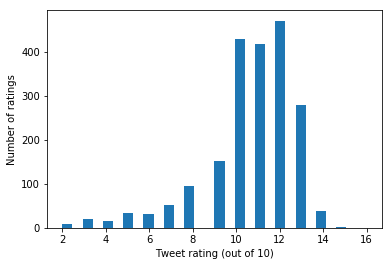

In [54]:
#Most common dog ratings
x = df_master.rating_numerator
plt.hist(x, range = (2,16) , bins = 30)
plt.ylabel('Number of ratings')
plt.xlabel('Tweet rating (out of 10)');

In [55]:
#Based on above, what is the percentage of all tweets from ratings 8 to 13? About 90%.
df_master.query('rating_numerator == [8,9,10,11,12,13]').shape[0]/df_master.rating_numerator.shape[0]

0.8978599221789884

In [57]:
#Under the first prediction, out of those dogs with a rating between 8 and 13, which had the most number of ratings? Golden Retriever
df_master.query('rating_numerator == [8,9,10,11,12,13] & p1_dog == True').p1.value_counts()

Golden_retriever               140
Labrador_retriever              96
Pembroke                        80
Chihuahua                       74
Pug                             53
Chow                            44
Samoyed                         40
Toy_poodle                      39
Pomeranian                      36
Cocker_spaniel                  30
Malamute                        30
French_bulldog                  23
Chesapeake_bay_retriever        23
Miniature_pinscher              22
German_shepherd                 20
Siberian_husky                  20
Staffordshire_bullterrier       20
Cardigan                        19
Beagle                          18
Shetland_sheepdog               17
Maltese_dog                     17
Eskimo_dog                      17
Shih-tzu                        17
Kuvasz                          15
Rottweiler                      15
Italian_greyhound               15
Lakeland_terrier                15
West_highland_white_terrier     14
Great_pyrenees      

In [60]:
#Based on first prediction, which breed of dog had the most favorites on average?
df_master.query('p1_dog == True').groupby('p1')['favorite_count'].mean().astype('int').sort_values(ascending = False).head()

p1
Saluki                     22982
French_bulldog             18116
Black-and-tan_coonhound    16192
Flat-coated_retriever      15997
Irish_water_spaniel        15538
Name: favorite_count, dtype: int64

In [61]:
#Based on first prediction, which breed of dog had the most retweets on average?
df_master.query('p1_dog == True').groupby('p1')['retweet_count'].mean().astype('int').sort_values(ascending = False).head()

p1
Standard_poodle     10384
Afghan_hound         6653
English_springer     5224
Eskimo_dog           5111
Tibetan_mastiff      4937
Name: retweet_count, dtype: int64

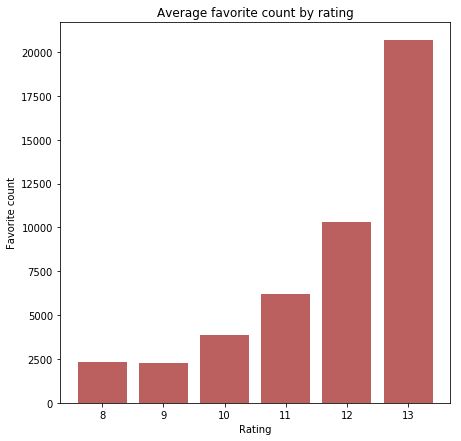

In [101]:
#Correlation between ratings and favorite count (for the 90% of data)
rating_count = list(range(8,14))
favorite = []
for i in range(8,14):
    rating = df_master[df_master.rating_numerator == i].favorite_count.mean().astype('int')
    favorite.append(rating)

plt.figure(figsize=(7,7))
plt.bar(rating_count, favorite, alpha = 0.75, color = 'brown')
plt.xlabel('Rating')
plt.ylabel('Favorite count');
plt.title('Average favorite count by rating');

In [79]:
#Actuals from table above
df_master.query('rating_numerator == [8,9,10,11,12,13]').groupby('rating_numerator')['favorite_count'].mean().astype('int')

rating_numerator
8      2313
9      2278
10     3881
11     6220
12    10287
13    20662
Name: favorite_count, dtype: int64